NAME: ANN WAIRIMU KIARIE  
ID:       CS-WIC03-25064  
TITLE: HOUSE PRICE PREDICTION USING LINEAR REGRESSION   
DESCRIPTION: This project predicts house prices based on area using Linear Regression Model.





DATA LOADING AND EXPLORATION

In [3]:
# Importing the required dataset
from google.colab import files
uploaded = files.upload()


Saving areas.csv to areas (1).csv
Saving homeprices.csv to homeprices (1).csv


Import os to confirm the uploaded files

In [4]:
# Confirming files saved
import os
print (os.listdir())

['.config', 'homeprices (1).csv', 'homeprices.csv', 'areas (1).csv', 'areas.csv', 'sample_data']


In [6]:
# Loading the dataset into the DataFrame
import pandas as pd
df = pd.read_csv('homeprices.csv')


In [7]:
# checking the first 5 rows
df.head()

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [8]:
# Inspecting the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    5 non-null      int64
 1   price   5 non-null      int64
dtypes: int64(2)
memory usage: 212.0 bytes


In [9]:
# checking null values
df.isnull().sum()

,0
area,0
price,0


In [10]:
# for statistics
df.describe()

,area,price
count,5.000000,5.000000
mean,3280.000000,626000.000000
std,540.370243,74949.983322
min,2600.000000,550000.000000
25%,3000.000000,565000.000000
50%,3200.000000,610000.000000
75%,3600.000000,680000.000000
max,4000.000000,725000.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
area,5.0,3280.0,540.370243,2600.0,3000.0,3200.0,3600.0,4000.0
price,5.0,626000.0,74949.983322,550000.0,565000.0,610000.0,680000.0,725000.0


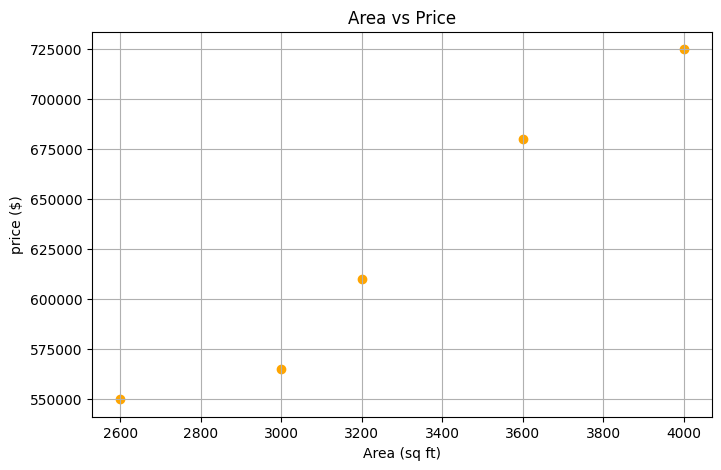

In [12]:
# Visualizing the data using scatter plot
import matplotlib.pyplot as plt
plt.figure(figsize=(8,5))
plt.scatter(df.area,df.price,color='orange',marker='o')
plt.title('Area vs Price')
plt.xlabel('Area (sq ft)')
plt.ylabel('price ($)')
plt.grid(True)
plt.show()

PREPARING THE DATA

In [13]:
# Importing library for splitting data
from sklearn.model_selection import train_test_split


In [14]:
x = df[['area']] # features (independent variables)
y = df['price'] # target (dependent variable)

In [21]:
# splitting the data into 70% training, 30% test
x_train,x_test,y_train,y_test = train_test_split(x,y,
                              test_size=0.3, # 20% for testing
                              random_state=42 # for reproducibility
                              )

In [22]:
# inspecting splits
print(x_train.shape,x_test.shape)
print(y_train.shape,y_test.shape)


(3, 1) (2, 1)
(3,) (2,)


BUILDING THE MODEL


In [23]:
# Importing LinearRegression
from sklearn.linear_model import LinearRegression

In [24]:
# creating the model
model = LinearRegression()

In [25]:
# training (fitting) the model on the training data
model.fit(x_train,y_train)

LinearRegression()

In [26]:
# checking the model coefficients after fitting the model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

Intercept: 213421.05263157893
Coefficient: [127.63157895]


In [28]:
# making predictions on the test data
y_pred = model.predict(x_test)
print("Predicted prices:",y_pred)

Predicted prices: [596315.78947368 723947.36842105]


EVALUATING THE MODEL USING METRICS

In [29]:
# Importing the eveluation metrics
from sklearn.metrics import mean_squared_error, r2_score

In [31]:
# Evaluating the model
import numpy as np
import warnings
warnings.filterwarnings('ignore')

mae = mean_squared_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test,y_pred)

In [34]:
# Display the results
print("Model Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared: {r2}")

Model Evaluation Metrics:
Mean Absolute Error (MAE): 490893351.800556
Mean Squared Error (MSE): 490893351.800556
Root Mean Squared Error (RMSE): 22156.113192537992
R-squared: 0.9232979137811631


VISUALIZING THE MODEL

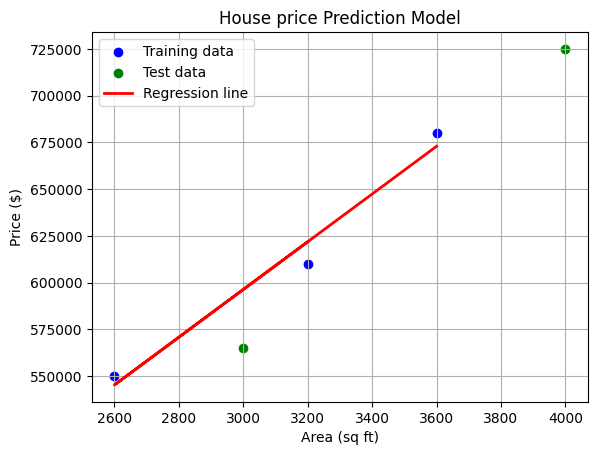

In [35]:
# Plot the training data
plt.scatter(x_train,y_train,color='blue',label='Training data')

# Plot the test data
plt.scatter(x_test,y_test,color='green',label='Test data')

# Regression line (fitted on training data)
plt.plot(x_train,model.predict(x_train),color='red',linewidth=2,label='Regression line')

# Labels
plt.title('House price Prediction Model')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price ($)')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
# Saving to files
plt.savefig('house_price_prediction.png')
plt.show()

<Figure size 640x480 with 0 Axes>